### Assessing the Readiness of HEI in Malaysia to Accept Generation Alpha

---

# Parsing Date

**Help Python recognize dates as composed of day, month, and year.**

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns

In [57]:
%%time
info_content_df = pd.read_csv('../data/raw/Info_Content.csv', index_col='ucid')
info_userdata_df = pd.read_csv('../data/raw/Info_UserData.csv', index_col='uuid')
log_problem_df = pd.read_csv('../data/raw/Log_Problem.csv', index_col='upid')

Wall time: 12.7 s


In [58]:
info_userdata_df['first_login_date_TW'].head()

uuid
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=    2019-01-24
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=    2019-01-24
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=    2019-01-24
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=    2019-01-24
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=    2019-01-24
Name: first_login_date_TW, dtype: object

In [59]:
log_problem_df['timestamp_TW'].head()

upid
ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=    2018-09-28 20:00:00 UTC
tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=    2018-09-28 10:15:00 UTC
6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=    2018-09-05 20:00:00 UTC
1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=    2018-09-14 16:30:00 UTC
8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=    2018-09-13 16:00:00 UTC
Name: timestamp_TW, dtype: object

### Convert our date columns to datetime

We can pandas what the format of our dates are with a guide called as "strftime directive", which you can find more information on at this link. The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are lots of possible parts of a date, but the most common are %d for day, %m for month, %y for a two-digit year and %Y for a four digit year.

In [60]:
info_userdata_df['first_login_date_TW'] = pd.to_datetime(info_userdata_df['first_login_date_TW'], format='%Y-%m-%d')
info_userdata_df = info_userdata_df.rename(columns = {'first_login_date_TW':'date_login'})

In [61]:
log_problem_df['timestamp_TW'] = pd.to_datetime(log_problem_df['timestamp_TW'], format='%Y-%m-%d %H:%M:%S %Z')
log_problem_df = log_problem_df.rename(columns = {'timestamp_TW':'datetime_attempt'})

In [62]:
log_problem_df['date_attempt'] = pd.to_datetime(log_problem_df['datetime_attempt'].dt.date, format='%Y-%m-%d')

Why don't you always use infer_datetime_format = True? There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.

Now when I check the first few rows of the new column, I can see that the dtype is `datetime64`. I can also see that my dates have been slightly rearranged so that they fit the default order datetime objects (year-month-day).

In [63]:
log_problem_df['date_attempt'].dtype

dtype('<M8[ns]')

In [64]:
info_userdata_df['date_login'].dtype

dtype('<M8[ns]')

In [65]:
# print the first few rows
info_userdata_df['date_login'].head()

uuid
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=   2019-01-24
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=   2019-01-24
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=   2019-01-24
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=   2019-01-24
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=   2019-01-24
Name: date_login, dtype: datetime64[ns]

In [66]:
log_problem_df['datetime_attempt'].head()

upid
ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=   2018-09-28 20:00:00+00:00
tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=   2018-09-28 10:15:00+00:00
6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=   2018-09-05 20:00:00+00:00
1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=   2018-09-14 16:30:00+00:00
8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=   2018-09-13 16:00:00+00:00
Name: datetime_attempt, dtype: datetime64[ns, UTC]

In [67]:
info_userdata_df = info_userdata_df.sort_values(by='date_login')

In [68]:
log_problem_df = log_problem_df.sort_values(by=['datetime_attempt','problem_number'])

In [69]:
merge_df = log_problem_df.merge(info_userdata_df,how='left',on='uuid')
merge_df = merge_df.merge(info_content_df,how='left',on='ucid')

In [70]:
merge_df['date_attempt'].dtype

dtype('<M8[ns]')

In [71]:
merge_df['date_attempt']

0         2018-08-01
1         2018-08-01
2         2018-08-01
3         2018-08-01
4         2018-08-01
             ...    
4273198   2018-11-30
4273199   2018-11-30
4273200   2018-11-30
4273201   2018-11-30
4273202   2018-11-30
Name: date_attempt, Length: 4273203, dtype: datetime64[ns]

In [72]:
merge_df['date_count'] = (merge_df['date_attempt'] - merge_df['date_login']).dt.days

In [73]:
merge_df.head()

,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,...,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id,date_count
0,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,1,1,True,10,1,0,False,...,【基礎】第幾個,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,0kg46I/6iMMbn3w0M3CGBQ0jcjNGl+29E3S2vihaIo0=,0
1,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,1,1,True,10,1,0,False,...,【基礎】一對一對應數數,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,0kg46I/6iMMbn3w0M3CGBQ0jcjNGl+29E3S2vihaIo0=,0
2,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2,1,True,8,1,0,False,...,【基礎】一對一對應數數,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,0kg46I/6iMMbn3w0M3CGBQ0jcjNGl+29E3S2vihaIo0=,0
3,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2,1,True,6,1,0,False,...,【基礎】第幾個,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,0kg46I/6iMMbn3w0M3CGBQ0jcjNGl+29E3S2vihaIo0=,0
4,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,3,1,True,7,1,0,False,...,【基礎】第幾個,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,0kg46I/6iMMbn3w0M3CGBQ0jcjNGl+29E3S2vihaIo0=,0


In [74]:
merge_df[merge_df.date_count < 0]

,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,...,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id,date_count
2072,2018-08-01 14:15:00+00:00,Em/Je6mkvAdTAkghecuUxYRpRU+O9dra2nx+cv3SbMU=,vlp5gR/PnY3FuaIANmLDZjLT7VR+mhj/8Skk+dfLf0I=,6,1,True,39,1,0,False,...,【基礎】利用短除法求最大公因數,Exercise,easy,math,junior,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,xYDz4OEv0xsri1IpmXlrgMLJ848rgySf+39xWpq4DBI=,CFq991L5i+mxDSbH+06jz+rWPf+FmW8hT4uxQjzwxpM=,SXt9vglhPBHTCUjT1OpmPaWRGTHHsVv/LbXBC3da7Jo=,-75
2075,2018-08-01 14:15:00+00:00,Em/Je6mkvAdTAkghecuUxYRpRU+O9dra2nx+cv3SbMU=,jyw4UBYsVqQ8IeYXUywTKN8TEZjJgYNuhb6JBTBoidg=,7,1,True,48,1,0,False,...,【基礎】公因數與最大公因數,Exercise,easy,math,junior,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,xYDz4OEv0xsri1IpmXlrgMLJ848rgySf+39xWpq4DBI=,CFq991L5i+mxDSbH+06jz+rWPf+FmW8hT4uxQjzwxpM=,SXt9vglhPBHTCUjT1OpmPaWRGTHHsVv/LbXBC3da7Jo=,-75
2077,2018-08-01 14:15:00+00:00,Em/Je6mkvAdTAkghecuUxYRpRU+O9dra2nx+cv3SbMU=,vlp5gR/PnY3FuaIANmLDZjLT7VR+mhj/8Skk+dfLf0I=,7,1,True,27,1,0,False,...,【基礎】利用短除法求最大公因數,Exercise,easy,math,junior,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,xYDz4OEv0xsri1IpmXlrgMLJ848rgySf+39xWpq4DBI=,CFq991L5i+mxDSbH+06jz+rWPf+FmW8hT4uxQjzwxpM=,SXt9vglhPBHTCUjT1OpmPaWRGTHHsVv/LbXBC3da7Jo=,-75
2080,2018-08-01 14:15:00+00:00,Em/Je6mkvAdTAkghecuUxYRpRU+O9dra2nx+cv3SbMU=,jyw4UBYsVqQ8IeYXUywTKN8TEZjJgYNuhb6JBTBoidg=,8,1,True,15,1,0,False,...,【基礎】公因數與最大公因數,Exercise,easy,math,junior,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,xYDz4OEv0xsri1IpmXlrgMLJ848rgySf+39xWpq4DBI=,CFq991L5i+mxDSbH+06jz+rWPf+FmW8hT4uxQjzwxpM=,SXt9vglhPBHTCUjT1OpmPaWRGTHHsVv/LbXBC3da7Jo=,-75
2084,2018-08-01 14:15:00+00:00,Em/Je6mkvAdTAkghecuUxYRpRU+O9dra2nx+cv3SbMU=,+kCFtC8nCf9I2/ee1BGgQRlVBoECQV9G/8z4fL7hzp4=,9,1,True,30,1,0,False,...,【基礎】互質,Exercise,easy,math,junior,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,xYDz4OEv0xsri1IpmXlrgMLJ848rgySf+39xWpq4DBI=,CFq991L5i+mxDSbH+06jz+rWPf+FmW8hT4uxQjzwxpM=,SXt9vglhPBHTCUjT1OpmPaWRGTHHsVv/LbXBC3da7Jo=,-75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4259453,2018-11-30 19:30:00+00:00,NoII8M5EnOEx9zlR1wezbhbYQ/J56GbLchJgG6UJfrw=,tKPJ+aL8jZdRX7rLqbXvQRirJzPopGK2mxUlBEHW1aA=,32,3,True,20,1,0,False,...,【基礎】乘除計算規律,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,4cISKCt3nXWe4r6Q8bzjOiL2EYYsZyT6Z0mNNJckqEc=,eqskaPeZ8bx/VzW4CFmsbbGikwBIf+4u4o78kmZkn+g=,-60
4259456,2018-11-30 19:30:00+00:00,NoII8M5EnOEx9zlR1wezbhbYQ/J56GbLchJgG6UJfrw=,tKPJ+aL8jZdRX7rLqbXvQRirJzPopGK2mxUlBEHW1aA=,33,2,False,34,4,2,True,...,【基礎】乘除計算規律,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,4cISKCt3nXWe4r6Q8bzjOiL2EYYsZyT6Z0mNNJckqEc=,eqskaPeZ8bx/VzW4CFmsbbGikwBIf+4u4o78kmZkn+g=,-60
4259457,2018-11-30 19:30:00+00:00,NoII8M5EnOEx9zlR1wezbhbYQ/J56GbLchJgG6UJfrw=,tKPJ+aL8jZdRX7rLqbXvQRirJzPopGK2mxUlBEHW1aA=,34,2,True,6,1,0,False,...,【基礎】乘除計算規律,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,4cISKCt3nXWe4r6Q8bzjOiL2EYYsZyT6Z0mNNJckqEc=,eqskaPeZ8bx/VzW4CFmsbbGikwBIf+4u4o78kmZkn+g=,-60
4259460,2018-11-30 19:30:00+00:00,NoII8M5EnOEx9zlR1wezbhbYQ/J56GbLchJgG6UJfrw=,tKPJ+aL8jZdRX7rLqbXvQRirJzPopGK2mxUlBEHW1aA=,35,3,True,19,1,0,False,...,【基礎】乘除計算規律,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,4cISKCt3nXWe4r6Q8bzjOiL2EYYsZyT6Z0mNNJckqEc=,eqskaPeZ8bx/VzW4CFmsbbGikwBIf+4u4o78kmZkn+g=,-60


### Select Day of Month

In [75]:
# get the day of the month from the date_parsed column
day_of_month_userdata = info_userdata_df['date_login'].dt.day
day_of_month_userdata.head()

uuid
wH1/Qs32k0Ti18bqWb1PxGfnveo4530CBZTZ/y7uW3k=    1
uKFRoPy+AIJ+cYGFyz7Xx9IyLYbWXDWnsjibDxd5UoU=    1
7bYGewVJB5Bs3b5LRfSdQtQ0HZIH2ehgLHoqRJo7qVo=    1
q9jfYP8EOHcoHIMy2CUdZ9Ce6S5KOvXNl5UmJpRt1gs=    1
XcgNk5O4+8zfK4wKJHhb7HXK7hySUZ1OyZdGDBCmtZA=    1
Name: date_login, dtype: int64

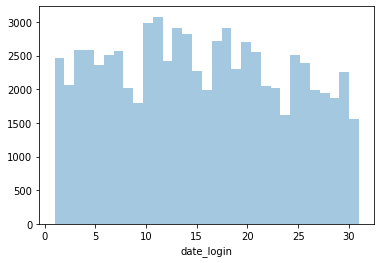

In [78]:
# remove na's
day_of_month_userdata = day_of_month_userdata.dropna()

# plot the day of the month
sns.distplot(day_of_month_userdata, kde=False, bins=31)

In [79]:
# get the day of the month from the date_parsed column
day_of_month_problem = log_problem_df['datetime_attempt'].dt.day
day_of_month_problem.head()

upid
2Q787l3L0G7f5P0iSWUE4hCfJfYo9uHL4pWV1U45JoQ=    1
/Wgjdl2BsldHZDdXXvzwGimusaMX548lqV2b7PgwXAs=    1
9Ksy3bdm0HTi0D+cdKSBKDQJjo5GNahep91FqHUrpts=    1
hYmhOfMMKaQNTrGze5TdATN0HNGJUEjDIYQaocuD4QY=    1
VMScsPmyKXsk5k7+abPqyEbDFRSsCE2XZs5lMKHQHEM=    1
Name: datetime_attempt, dtype: int64

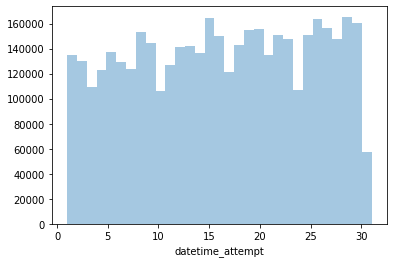

In [80]:
# remove na's
day_of_month_problem = day_of_month_problem.dropna()

# plot the day of the month
sns.distplot(day_of_month_problem, kde=False, bins=31)

Yep, it looks like we did parse our dates correctly & this graph makes good sense to me.

In [81]:
info_content_df.to_csv('../data/interim/Info_Content.csv')
info_userdata_df.to_csv('../data/interim/Info_UserData.csv')
log_problem_df.to_csv('../data/interim/Log_Problem.csv')